<a href="https://colab.research.google.com/github/Elwing-Chou/ml1206/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# 3.9: 最新 3.8(我不太確認): 裝最新版試試看, 不行2.0.0
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [21]:
import pandas as pd
idx = 0
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


5


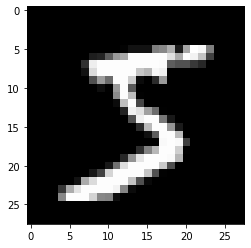

In [22]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
#  cmap="Blues_r"
print(y_train[idx])
plt.imshow(x_train[idx], cmap="gray")

In [23]:
# Sequential(一層一層往上)/Model(任何形狀)
from tensorflow.keras.models import Sequential
# 全連階層
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 輸出
# 1個神經元(Sigmoid): plog1/q + (1-p)log1/1-q -> BinaryCrossEntropy
# 多個神經元(Softmax): sigma pi log 1/qi -> CategoricalCrossEntropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])

In [25]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [26]:
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0
pd.DataFrame(x_train_norm[0])

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
779,0.0
780,0.0
781,0.0
782,0.0


In [ ]:
# 1 round: 54000 / 100 -> 540次梯度下降
# verbose: 0(quiet) 1(full) 2(no progress bar)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("mnist.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
          y_train_cat,
          batch_size=100,
          epochs=100,
          verbose=2,
          validation_split=0.1,
          callbacks=callbacks)

In [28]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0740 - accuracy: 0.9768


[0.07404960691928864, 0.9768000245094299]

In [33]:
pre = model.predict(x_test_norm).argmax(axis=1)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# tensorflow: y_train_cat sklearn: y_train
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
             index=["{}(True)".format(i) for i in range(10)],
             columns=["{}(Pred)".format(i) for i in range(10)])

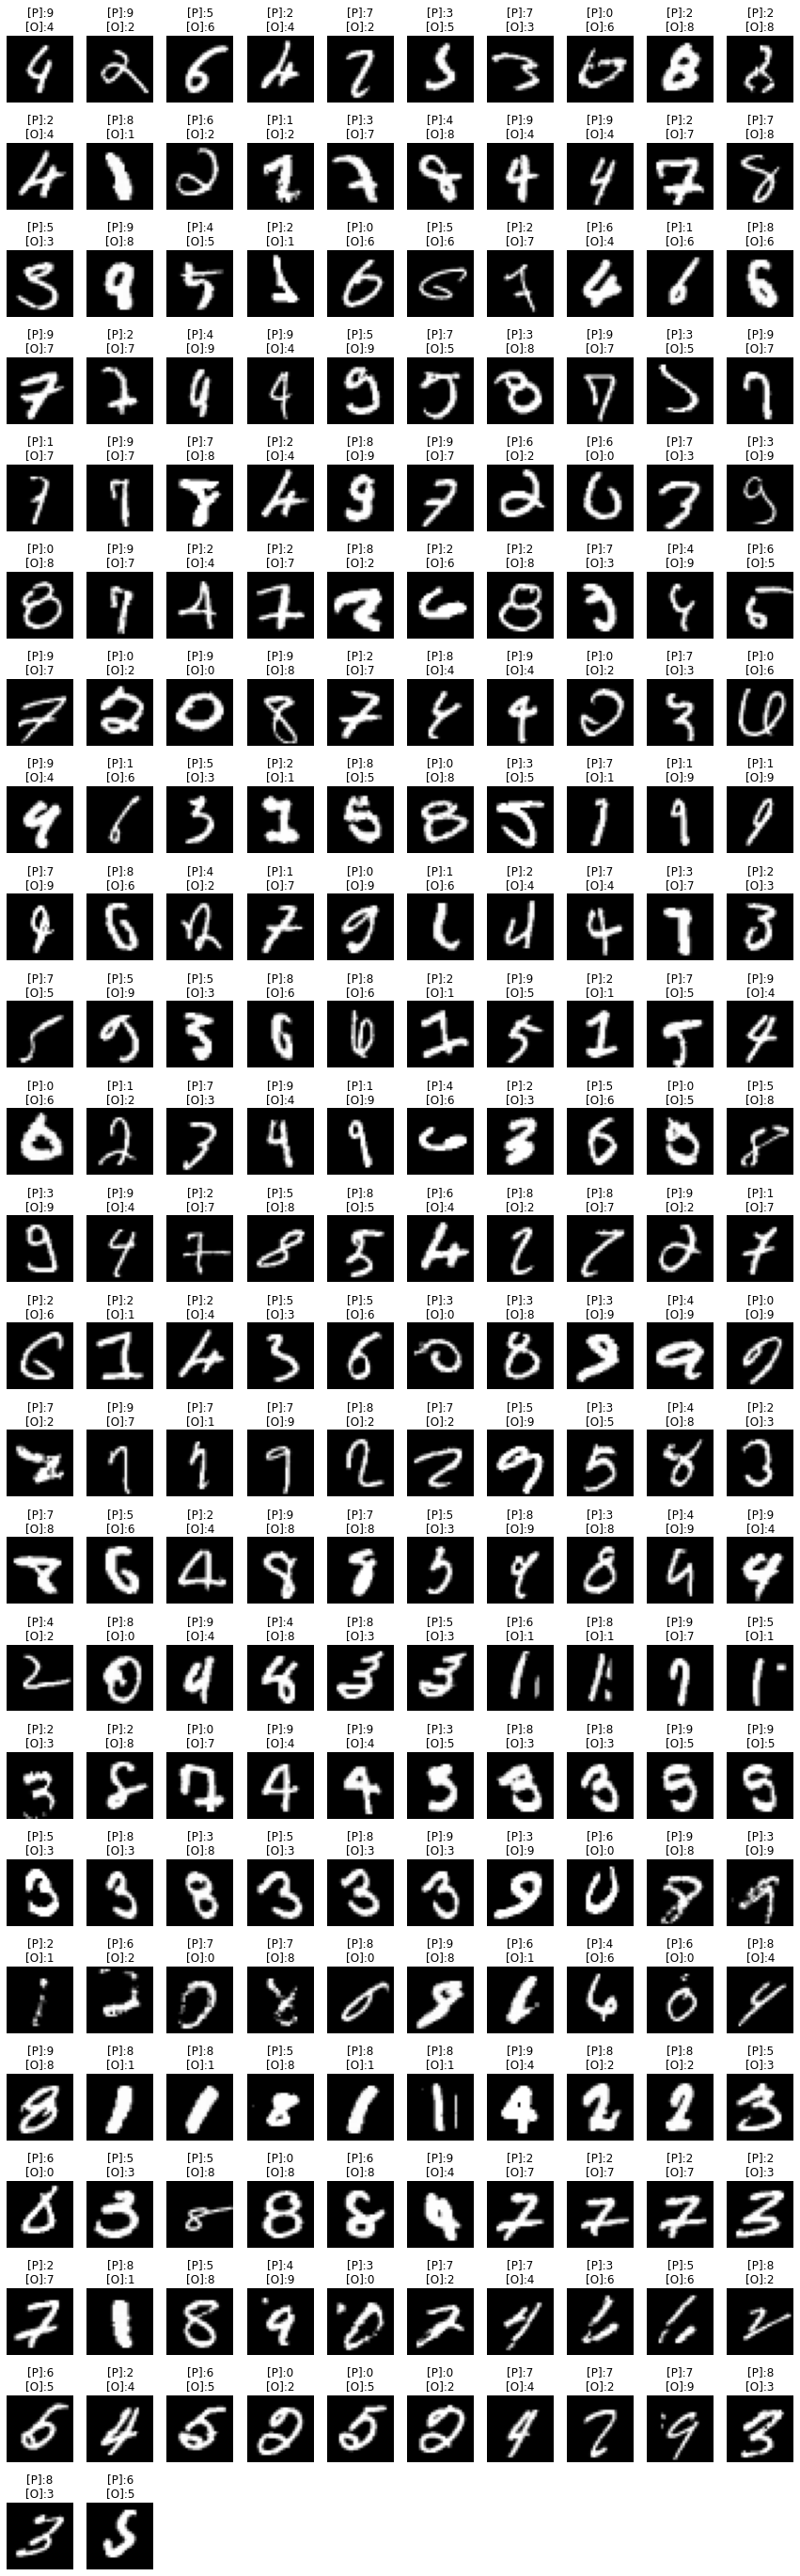

In [50]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
pre_false_pre = pre[idx]
pre_false_label = y_test[idx]
pre_false_img = x_test[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(15, 50))

for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(pre_false_pre[i],
                                pre_false_label[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i], cmap="gray")

In [42]:
n = np.array([
    [0, 0, 0],
    [4, 0, 6]
])
np.nonzero(n)

(array([1, 1]), array([0, 2]))

In [52]:
# HDFVIEW: https://www.hdfgroup.org/downloads/hdfview/
# 手動儲存: model.save("mnist.h5")
# 讀取: 不用做(compile) 可以做(fit/predict/evaluate)
import os
from tensorflow.keras.models import load_model

if os.path.exists("mnist.h5"):
    print("Load Model...")
    model = load_model("mnist.h5")
else:
    print("Create Model...")
    layers = [
        Dense(128, activation="relu", input_dim=784),
        Dense(10, activation="softmax")
    ]
    model = Sequential(layers)
    model.compile(loss=CategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])
model.summary()

Create Model...
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
